In [1]:
%pylab inline
import sys


from scipy.signal import find_peaks

sys.path.insert(0, '../../picwig1d/')

from postpicwig import moviereader, tracesreader

from scipy.ndimage import gaussian_filter1d

Populating the interactive namespace from numpy and matplotlib


In [11]:
!./1dpic.exe max_ell.ini 0. 25 4000 4

Delay=3.141593e+00
density: 4000.000000
a0: 25.000000
duration: 4.000000
bx: 0.000000
Number of cells: 8000
Number of timesteps: 8000
Number of electrons: 100
Number of ions1: 1
NofTS=8000
N=8000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=8000
Steps passed: 0 of 8000
Time elapsed = 0.660673 seconds


In [12]:
datadir='./data/'
griddata=tracesreader.GetGridParameters(datadir)

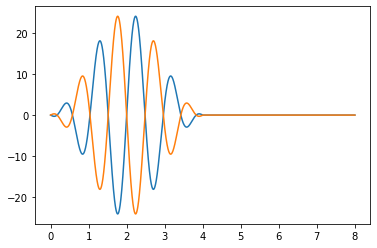

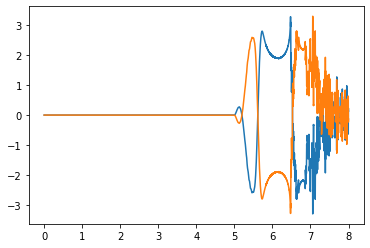

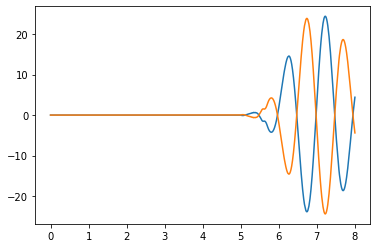

In [13]:
initial_p = tracesreader.GetTracesData(datadir, griddata, 'fp_initial') 
initial_s = tracesreader.GetTracesData(datadir, griddata, 'gm_initial') 

plot(griddata.t/2/pi, initial_p)
plot(griddata.t/2/pi, initial_s)

figure()
reflected_p = tracesreader.GetTracesData(datadir, griddata, 'fm_reflected')
reflected_s = tracesreader.GetTracesData(datadir, griddata, 'gp_reflected')

plot(griddata.t/2/pi, reflected_p)
plot(griddata.t/2/pi, reflected_s)

figure()
passed_p = tracesreader.GetTracesData(datadir, griddata, 'fp_passed')
passed_s = tracesreader.GetTracesData(datadir, griddata, 'gm_passed')

plot(griddata.t/2/pi, passed_p)
plot(griddata.t/2/pi, passed_s)

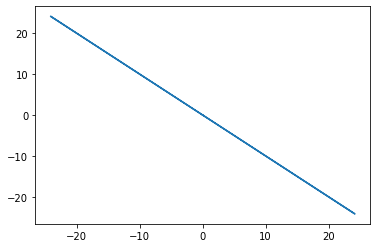

In [14]:
plot(initial_p, initial_s)

In [15]:
dt=griddata.t[1]-griddata.t[0]
sp_y=fft.fft(reflected_p)
sp_z=fft.fft(reflected_s)
#sp_y=fft.fft(initial_p)
#sp_z=fft.fft(initial_s)
w=fft.fftfreq(len(reflected_p), d=dt)

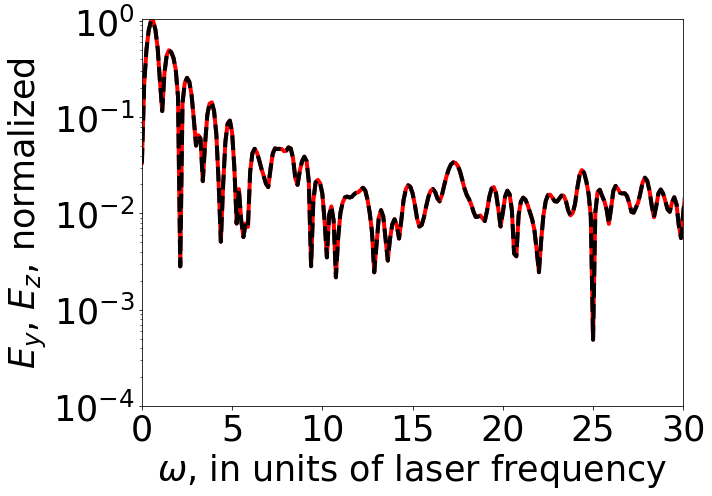

In [17]:
plt.figure(figsize=(10, 7))

#sp_y = gaussian_filter1d(sp_y, 1)
#sp_z = gaussian_filter1d(sp_z, 1)

semilogy(w[:len(w)//2]*2*pi,abs(sp_y[:len(w)//2])/amax(abs(sp_y[:len(w)//2])), lw=4, color='r')
semilogy(w[:len(w)//2]*2*pi,abs(sp_z[:len(w)//2])/amax(abs(sp_z[:len(w)//2])), lw=4, linestyle='dashed', color='k')

xlim(0,30)
ylim(1e-4,1.05)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel("$\omega$, in units of laser frequency", fontsize=35)
plt.ylabel("$E_y$, $E_z$, normalized", fontsize=35)
plt.tight_layout()
plt.savefig("bx=0.png")

(1e-06, 1)

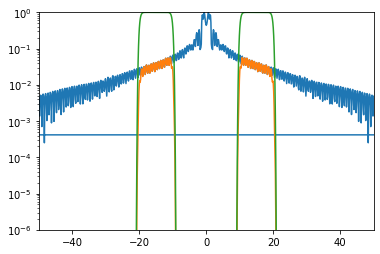

In [641]:
#this is for 2000
#filter_center=17.0
#this is for 8000
filter_center=15.
filter_width=5.
bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
semilogy(w*2*pi, abs(sp_y)/amax(abs(sp_y)))
semilogy(w*2*pi, abs(bandgap_filter*sp_y)/amax(abs(sp_y)))
semilogy(w*2*pi, bandgap_filter)

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
xlim(-50,50)
ylim(1e-6,1)

(0.0, 30.0)

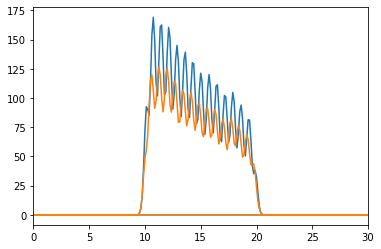

In [642]:
plot(w*2*pi, abs(sp_y_filt))
plot(w*2*pi, abs(sp_z_filt))
xlim(0,30)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-3.0000005, 3.0000005)

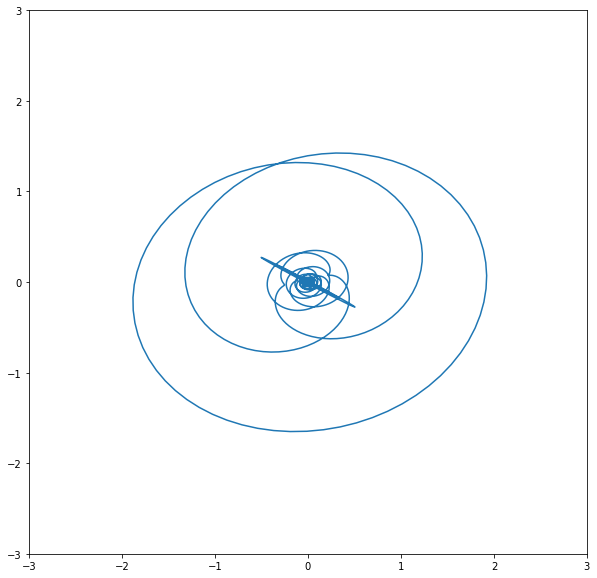

In [643]:
plt.figure(figsize=(10,10))
filtered_y=fft.ifft(sp_y_filt)
filtered_z=fft.ifft(sp_z_filt)
plot(filtered_y, filtered_z)

val = 3.0000005
xlim(-val,val)
ylim(-val,val)

81 161
peak ellipticity
0.8597797291501568
all ellipticity
0.7036375349441404


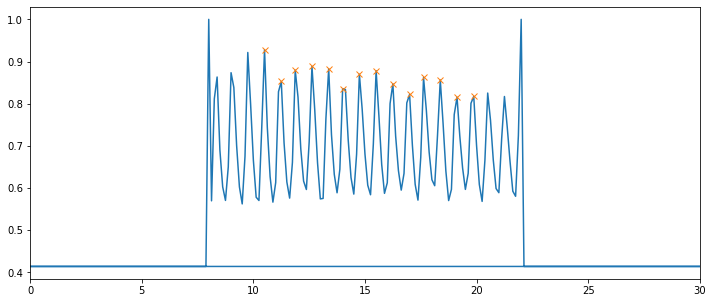

In [644]:
### Stokes parameters and ellipticity
spy=sp_y_filt
spz=sp_z_filt

S0=spy*conjugate(spy)+spz*conjugate(spz)
S1=spy*conjugate(spy)-spz*conjugate(spz)
S2=2*real(spy*conjugate(spz))
S3=2*imag(spy*conjugate(spz))

#V=sqrt(S1**2+S2**2+S3**2)/S0
ind1 = np.where((w*2*np.pi)>filter_center-filter_width)[0][0]
ind2 = np.where((w*2*np.pi)>=filter_center+filter_width)[0][0]
print(ind1, ind2)

chi=0.5*arctan((S3+1e-200)/(sqrt(S1**2+S2**2)+1e-200))
ellips = abs(tan(chi))[ind1:ind2]
figure(figsize=(12,5))
plot(w*2*np.pi, abs(tan(chi)))
peaks = find_peaks(ellips)
plt.plot(w[ind1:ind2][peaks[0]]*2*pi, ellips[peaks[0]], 'x')
xlim(0,30)

print("peak ellipticity")
print(mean(ellips[peaks[0]]))
print("all ellipticity")
print(mean(abs(tan(chi))[ind1:ind2]))
#print(ellips[14], w[ind1:ind2][10]*2*np.pi)

In [645]:
# spec_init_p = np.fft.fft(initial_p)
spec_init_s = np.fft.fft(initial_s)
dt=griddata.t[1]-griddata.t[0]
w = np.fft.fftfreq(len(initial_p), d=dt)
S0=spec_init_p*conjugate(spec_init_p)+spec_init_s*conjugate(spec_init_s)
total_energy = abs(np.sum(S0))
print(total_energy/len(initial_p))#*(w[1]-w[0]))

summ = (np.sum(initial_p**2)+np.sum(initial_s**2))#*dt
print(summ)


sp_y=fft.fft(reflected_p)
sp_z=fft.fft(reflected_s)
filter_center=15.0
filter_width=5.
bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
spy = bandgap_filter*sp_y
spz = bandgap_filter*sp_z

S0_filt=spy*conjugate(spy)+spz*conjugate(spz)
filt_sum = abs(np.sum(S0_filt))
print(filt_sum/total_energy)

ValueError: operands could not be broadcast together with shapes (12001,) (8001,) 

In [646]:
def ellipticity(initial_p, initial_s, p, s, dt):
    sp_y=fft.fft(p)
    sp_z=fft.fft(s)
    w=fft.fftfreq(len(p), d=dt)

    filter_center=15.0
    filter_width=5.
    bandgap_filter_minus=exp(-(w*2*pi-filter_center)**16/filter_width**16)
    bandgap_filter_plus=exp(-(w*2*pi+filter_center)**16/filter_width**16)
    bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
    sp_y_filt = bandgap_filter*sp_y
    sp_z_filt = bandgap_filter*sp_z

    spy=sp_y_filt
    spz=sp_z_filt
    S0=spy*conjugate(spy)+spz*conjugate(spz)
    S1=spy*conjugate(spy)-spz*conjugate(spz)
    S2=2*real(spy*conjugate(spz))
    S3=2*imag(spy*conjugate(spz))
    energy = np.sum(S0)
    
    #####################################################
    sp_y_init=fft.fft(initial_p)
    sp_z_init=fft.fft(initial_s)
    #total_S0 = sp_y*conjugate(sp_y)+sp_z*conjugate(sp_z)
    total_S0 = sp_y_init*conjugate(sp_y_init)+sp_z_init*conjugate(sp_z_init)
    ####################################################
    
    energy = abs(energy)/abs(np.sum(total_S0))
    print("energy: ", energy)#, abs(np.sum(total_S0)))

    ind1 = np.where((w*2*np.pi)>10)[0][0]
    ind2 = np.where((w*2*np.pi)>=20)[0][0]

    chi=0.5*arctan((S3+1e-200)/(sqrt(S1**2+S2**2)+1e-200))
    ellips = abs(tan(chi))[ind1:ind2]
    peaks = find_peaks(ellips)
    
    return ( mean(ellips[peaks[0]]), mean(abs(tan(chi))[ind1:ind2]), energy )

def get_ells():
    griddata=tracesreader.GetGridParameters(datadir)
    reflected_p = tracesreader.GetTracesData(datadir, griddata, 'fm_reflected')
    reflected_s = tracesreader.GetTracesData(datadir, griddata, 'gp_reflected')
    passed_p = tracesreader.GetTracesData(datadir, griddata, 'fp_passed')
    passed_s = tracesreader.GetTracesData(datadir, griddata, 'gm_passed')
    initial_p = tracesreader.GetTracesData(datadir, griddata, 'fp_initial') 
    initial_s = tracesreader.GetTracesData(datadir, griddata, 'gm_initial') 

    dt=griddata.t[1]-griddata.t[0]
    
    peaks_r, means_r, energy_r = ellipticity(initial_p, initial_s, reflected_p, reflected_s, dt)
    peaks_t, means_t, energy_t = ellipticity(initial_p, initial_s, passed_p, passed_s, dt)
    return peaks_r, means_r, energy_r, peaks_t, means_t, energy_t

    

## CONTENTS IMG

In [494]:
bxs = np.linspace(10, 35, 50)
a0s = [25]
densities = [400]
durations = [4]

res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

for i,a0 in enumerate(a0s):
    for j,bx in enumerate(bxs):
        for k,density in enumerate(densities):
            for l,duration in enumerate(durations):
                str_bx = str(bx)
                str_a0 = str(a0)
                str_ep = str(density)
                str_dur = str(duration)
                !./1dpic.exe cep_lp_fig_a.ini {str_bx} {str_a0} {str_ep} {str_dur}
                res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()


Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 10.000000
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 1.956277 seconds
energy:  0.0009413960214760842
energy:  2.3075483768327455e-05
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 10.510204
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 2.084937 seconds
energy:  0.0009153662683878787
energy:  1.4708841592612693e-05
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 11.020408
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Ma

Time elapsed = 2.142273 seconds
energy:  0.0026802025461135836
energy:  0.0005220971405743412
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 20.714286
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 2.164508 seconds
energy:  0.0033222219952871797
energy:  0.0005188979515168457
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 21.224490
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 2.188888 seconds
energy:  0.003594163553452109
energy:  0.0004527649864481013
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 21.734694
Number of cells: 8000
Number of

Steps passed: 9999 of 12000
Time elapsed = 1.930285 seconds
energy:  0.000699836920735669
energy:  0.0004834796454153538
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 31.428571
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 1.939405 seconds
energy:  0.000464555316915831
energy:  0.00031819585768478063
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 31.938776
Number of cells: 8000
Number of timesteps: 12000
Number of electrons: 1000
Number of ions1: 10
NofTS=12000
N=12000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=12000
Steps passed: 0 of 12000
Steps passed: 9999 of 12000
Time elapsed = 1.947127 seconds
energy:  0.0005995051233956836
energy:  0.00026744598413623583
Delay=3.141593e+00
density: 400.000000
a0: 25.000000
duration: 4.000000
bx: 32.448980
Nu

In [498]:
print(res1_r.max())
print(res2_r.max())

print(res1_r.argmax())
print(res2_r.argmax())
print(bxs[25])

0.856244006179511
0.7703611661448638
25
28
22.755102040816325


## CONTENTS IMG FINISHED

In [493]:
bxs = np.arange(0, 100)
#bxs = np.linspace(0, 100, 5)
a0s = [30]
densities = [4000]
durations = [4, 8, 12, 16]


In [5]:
# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

In [6]:
# np.save("./revision_data/light_peak_reflected_1", res1_r)
# np.save("./revision_data/light_peak_transmitted_1", res1_t)
# np.save("./revision_data/light_mean_reflected_1", res2_r)
# np.save("./revision_data/light_mean_transmitted_1", res2_t)
# np.save("./revision_data/energy_reflected_1", ener_r)
# np.save("./revision_data/energy_transmitted_1", ener_t)

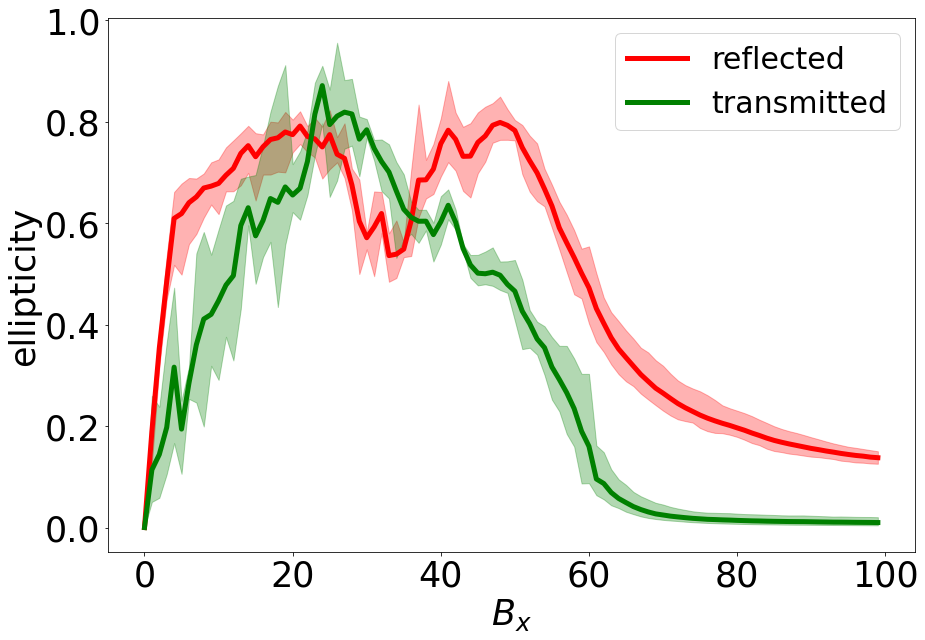

In [7]:
ares1_r = np.load("./revision_data/light_peak_reflected_1.npy")
ares1_t = np.load("./revision_data/light_peak_transmitted_1.npy")
ares2_r = np.load("./revision_data/light_mean_reflected_1.npy")
ares2_t = np.load("./revision_data/light_mean_transmitted_1.npy")
aener_r = np.load("./revision_data/energy_reflected_1.npy")
aener_t = np.load("./revision_data/energy_transmitted_1.npy")

fig, ax = plt.subplots()

fig.set_size_inches(13,9)

ax.plot(bxs, ares1_r[0,:,0,:].mean(axis=1), label='reflected', color="red", lw=5)
ax.plot(bxs, ares1_t[0,:,0,:].mean(axis=1), label='transmitted', color='green', lw=5)
amins_r = ares1_r[0,:,0,:].min(axis=1)
amaxs_r = ares1_r[0,:,0,:].max(axis=1)
amins_t = ares1_t[0,:,0,:].min(axis=1)
amaxs_t = ares1_t[0,:,0,:].max(axis=1)
plt.xlabel("$B_x$", fontsize=35)
plt.ylabel("ellipticity", fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
ax.fill_between(bxs, (amins_r), (amaxs_r), color='r', alpha=.3)
ax.fill_between(bxs, (amins_t), (amaxs_t), color='g', alpha=.3)
plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig("new_img_a.pdf", format='pdf')

In [40]:
#for i in range(len(durations)):
    #plt.plot(res1_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#    plt.plot(res2_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
    #plt.plot(res1_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#    plt.plot(res2_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
    #plt.plot(ener_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
    #plt.plot(ener_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")

# plt.plot(res2_r[0,:,0,:].mean(axis=1), label='reflected')
# plt.plot(res2_t[0,:,0,:].mean(axis=1), label='transmitted')

# plt.legend()

In [41]:
# a0s = [85]
# densities = [30000]
# durations = [4, 8, 12, 16]

# res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

In [42]:
# np.save("./revision_data/light_peak_reflected_2", res1_r)
# np.save("./revision_data/light_peak_transmitted_2", res1_t)
# np.save("./revision_data/light_mean_reflected_2", res2_r)
# np.save("./revision_data/light_mean_transmitted_2", res2_t)
# np.save("./revision_data/energy_reflected_2", ener_r)
# np.save("./revision_data/energy_transmitted_2", ener_t)

In [34]:
# res1_r = np.load("./revision_data/light_peak_reflected_2.npy")
# res1_t = np.load("./revision_data/light_peak_transmitted_2.npy")
# res2_r = np.load("./revision_data/light_mean_reflected_2.npy")
# res2_t = np.load("./revision_data/light_mean_transmitted_2.npy")
# ener_r = np.load("./revision_data/energy_reflected_2.npy")
# ener_t = np.load("./revision_data/energy_transmitted_2.npy")

# fig, ax = plt.subplots()

# ax.plot(bxs, res2_r[0,:,0,:].mean(axis=1), label='reflected', color="red", linestyle='dashed')
# ax.plot(bxs, res2_t[0,:,0,:].mean(axis=1), label='transmitted', color='green', linestyle='dashed')
# mins_r = res2_r[0,:,0,:].min(axis=1)
# maxs_r = res2_r[0,:,0,:].max(axis=1)
# mins_t = res2_t[0,:,0,:].min(axis=1)
# maxs_t = res2_t[0,:,0,:].max(axis=1)

# ax.fill_between(bxs, (mins_r), (maxs_r), color='r', alpha=.3)
# ax.fill_between(bxs, (mins_t), (maxs_t), color='g', alpha=.3)
# plt.legend()

In [47]:
# for i in range(len(durations)):
#     #plt.plot(res1_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     #plt.plot(res2_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     #plt.plot(res1_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#     #plt.plot(res2_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
#     plt.plot(ener_r[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, reflected")
#     plt.plot(ener_t[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles, transmitted")
# plt.legend()

In [13]:
a0s = [20, 30, 40, 50]

In [45]:
densities = [500]
durations = [4]


res1_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
res2_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
ener_r = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

res1_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
res2_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
ener_t = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

for i,a0 in enumerate(a0s):
    for j,bx in enumerate(bxs):
        for k,density in enumerate(densities):
            for l,duration in enumerate(durations):
                str_bx = str(bx)
                str_a0 = str(a0)
                str_ep = str(density)
                str_dur = str(duration)
                !./1dpic.exe cep_lp_fig_b.ini {str_bx} {str_a0} {str_ep} {str_dur}
                res1_r[i,j,k,l], res2_r[i,j,k,l], ener_r[i,j,k,l], res1_t[i,j,k,l], res2_t[i,j,k,l], ener_t[i,j,k,l] = get_ells()

Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 0.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 41.211542 seconds
energy:  0.001144266911431257
energy:  0.0005827382157981002
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 1.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 40.705145 seconds
energy:  0.0014215649184103109
energy:  0.0005924203349083171
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 2.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass

energy:  0.0015229190467319987
energy:  0.002020537753314634
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 21.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.826718 seconds
energy:  0.0012723477015608882
energy:  0.0008778538088213599
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 22.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.930274 seconds
energy:  0.0011125946200439608
energy:  0.0004016171314554416
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 23.000000
Number of cells: 40000
Number of timesteps: 50000
Number of

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.303098 seconds
energy:  1.6472555633376848e-07
energy:  8.802460792760256e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 42.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.335643 seconds
energy:  9.99726281277935e-08
energy:  7.527805361126232e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 43.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.294256 seconds
energy:  1.1153582217325478e-07
energy:  6.934378775891349e-08
D

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.496175 seconds
energy:  2.5332647477094875e-09
energy:  3.4101532618820294e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 63.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.693042 seconds
energy:  2.590580483134102e-09
energy:  3.4178870929415044e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 64.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.377172 seconds
energy:  2.5273321571430632e-09
energy:  3.422796692229849e-0

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.308368 seconds
energy:  1.1110062447609959e-09
energy:  3.486438164218592e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 84.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.539163 seconds
energy:  1.171973870958173e-09
energy:  3.489171491323889e-08
Delay=3.141593e+00
density: 500.000000
a0: 20.000000
duration: 4.000000
bx: 85.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.618551 seconds
energy:  1.0940402177029614e-09
energy:  3.491525705434345e-08


N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.126796 seconds
energy:  0.0003335362618799041
energy:  7.005564032713785e-05
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 5.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.635858 seconds
energy:  0.000443407117124431
energy:  0.00011324992786542857
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 6.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.403291 seconds
energy:  0.0006230750643547575
energy:  9.695654553571319e-05
Dela

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.607464 seconds
energy:  0.003835191479217099
energy:  0.0002722772873153815
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 26.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.393212 seconds
energy:  0.0033327322337635256
energy:  0.00020923315093631056
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 27.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.550941 seconds
energy:  0.005753430328773866
energy:  0.00036588647779077824
De

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.525055 seconds
energy:  3.879769473867349e-06
energy:  1.3770371171377557e-06
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 47.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.452636 seconds
energy:  1.748876411116528e-06
energy:  5.881346752189474e-07
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 48.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.452436 seconds
energy:  9.231518560721051e-07
energy:  2.6940634761668743e-07


N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.287388 seconds
energy:  3.539084859551985e-08
energy:  3.859804153920586e-08
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 68.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.473420 seconds
energy:  4.889681222251379e-08
energy:  3.75670565321856e-08
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 69.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.854087 seconds
energy:  2.9434766049598706e-08
energy:  3.593301170554638e-08
De

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.759779 seconds
energy:  1.6546759954660592e-09
energy:  3.501765949051084e-08
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 89.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.755725 seconds
energy:  1.1688422694972339e-09
energy:  3.50077280710396e-08
Delay=3.141593e+00
density: 500.000000
a0: 30.000000
duration: 4.000000
bx: 90.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.514077 seconds
energy:  1.1191199470549218e-09
energy:  3.502379105018976e-08


N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.078644 seconds
energy:  0.0007013207896903325
energy:  0.00021438062828420582
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 10.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.538142 seconds
energy:  0.0005573645181979098
energy:  0.00026202762456010173
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 11.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.521788 seconds
energy:  0.0008377034103933407
energy:  0.0002638492975385956


N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.669097 seconds
energy:  0.0019168185657164928
energy:  0.0002588041954786586
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 31.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.376362 seconds
energy:  0.0021080222094599
energy:  0.00026641804474536777
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 32.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.826249 seconds
energy:  0.002283311016944588
energy:  0.0002084386267706023
Delay

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.387717 seconds
energy:  0.00042703657969899193
energy:  0.0001564549384149042
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 52.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.477673 seconds
energy:  0.00040338399041189995
energy:  0.00012478011000675214
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 53.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.076126 seconds
energy:  0.0003199990118239628
energy:  7.619028699282396e-05

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.154011 seconds
energy:  1.1709835711087814e-07
energy:  4.2253796074097e-08
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 73.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.921783 seconds
energy:  5.6350279699448896e-08
energy:  4.0523556156508213e-08
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 74.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.670657 seconds
energy:  3.971905355380001e-08
energy:  3.802462345398871e-08
D

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.669401 seconds
energy:  2.285413000031873e-08
energy:  3.616124390330256e-08
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 94.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.667775 seconds
energy:  1.6248078614864597e-08
energy:  3.563898496125029e-08
Delay=3.141593e+00
density: 500.000000
a0: 40.000000
duration: 4.000000
bx: 95.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.524243 seconds
energy:  1.0192973150384369e-08
energy:  3.5607213945140394e-08

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.611221 seconds
energy:  0.0011991188239745562
energy:  4.589776268132585e-05
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 15.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.542873 seconds
energy:  0.0011520570712220475
energy:  0.00013486430505050867
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 16.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.190969 seconds
energy:  0.0011956726855583799
energy:  0.0001373871768503368
D

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.044926 seconds
energy:  0.001380272401584495
energy:  9.689133074250651e-06
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 36.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.771437 seconds
energy:  0.0014369343017500253
energy:  4.3046962165146636e-05
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 37.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.577630 seconds
energy:  0.0013261967597912921
energy:  0.0001044907940777998
De

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.997384 seconds
energy:  0.0014737237350007787
energy:  0.0004720313748347746
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 57.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.596987 seconds
energy:  0.001249978478044241
energy:  0.0001705504412156753
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 58.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.498112 seconds
energy:  0.0007196217127943362
energy:  0.0002507918451781069
Del

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.062880 seconds
energy:  2.8284300329718e-06
energy:  2.769348522549151e-07
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 78.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 38.126317 seconds
energy:  2.457702195388903e-06
energy:  3.0754942496187685e-07
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 79.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.888137 seconds
energy:  1.5736974771709625e-06
energy:  1.6976989111711993e-07
D

N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.642962 seconds
energy:  2.7515687663160854e-08
energy:  3.671049477459477e-08
Delay=3.141593e+00
density: 500.000000
a0: 50.000000
duration: 4.000000
bx: 99.000000
Number of cells: 40000
Number of timesteps: 50000
Number of electrons: 500
Number of ions1: 50
NofTS=50000
N=50000
Ion1 Mass=3.374568e+06
NumberOfTimeSteps=50000
Steps passed: 0 of 50000
Steps passed: 49999 of 50000
Time elapsed = 37.673179 seconds
energy:  2.3662499944277548e-08
energy:  3.6844725118041696e-08


In [46]:
# np.save("./revision_data/light_peak_reflected_3", res1_r)
# np.save("./revision_data/light_peak_transmitted_3", res1_t)
# np.save("./revision_data/light_mean_reflected_3", res2_r)
# np.save("./revision_data/light_mean_transmitted_3", res2_t)
# np.save("./revision_data/energy_reflected_3", ener_r)
# np.save("./revision_data/energy_transmitted_3", ener_t)

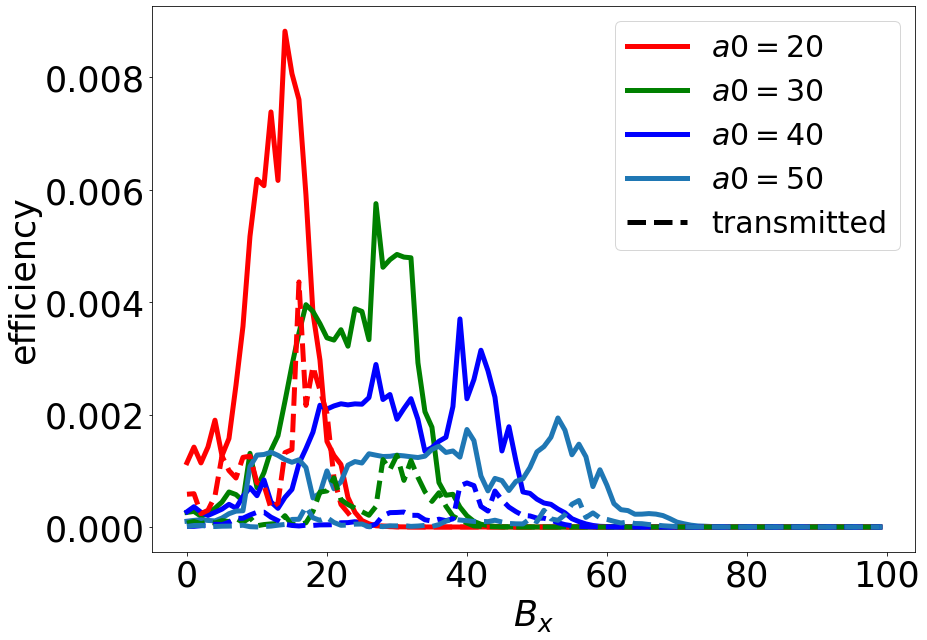

In [39]:
bres1_r = np.load("./revision_data/light_peak_reflected_3.npy")
bres1_t = np.load("./revision_data/light_peak_transmitted_3.npy")
bres2_r = np.load("./revision_data/light_mean_reflected_3.npy")
bres2_t = np.load("./revision_data/light_mean_transmitted_3.npy")
bener_r = np.load("./revision_data/energy_reflected_3.npy")
bener_t = np.load("./revision_data/energy_transmitted_3.npy")
#bener_r = np.load("./old_data/energy.npy")/16
#bener_t = np.load("./old_data/energy_transmitted_3.npy")

#ener = np.load("./energy.npy")

plt.figure(figsize=(13,9))

colors = ['r', 'g', 'b', 'C0']
for i in range(len(a0s)):
    #plt.plot(bres1_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    #plt.plot(bres2_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    #plt.plot(bres1_t[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, transmitted")
    #plt.plot(bres2_t[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, transmitted")
    #plt.plot(bener_r[i,:,0,0], label='$a0 = $' + str(a0s[i]) + " cycles, reflected")
    plt.plot(bener_r[i,:,0,0], label='$a0 = $' + str(a0s[i]), color=colors[i], lw=5)
for i in range(len(a0s)):
    plt.plot(bener_t[i,:,0,0], color=colors[i],linestyle='dashed', lw=5)
plt.plot([],[], linestyle='dashed', color='k', label='transmitted', lw=5)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel("efficiency", fontsize=35)
plt.xlabel("$B_x$",fontsize=35)

plt.legend(fontsize=30)
plt.tight_layout()
plt.savefig("new_img_b.pdf", format='pdf')

In [ ]:
#np.save("res1_1", res1)
#np.save("res1_2", res1_2)

In [ ]:
#np.save("res2_1", res2)
#np.save("res2_2", res2_2)

In [ ]:
# res2_2 = np.load("res2_2.npy")
# for i in range(len(durations)):
#     #plt.plot(res1_2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.plot(res2_2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     #plt.plot(energy[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.legend()

In [ ]:
# #res1 = np.load("res1_1.npy")
# res2 = np.load("res2_1.npy")
# for i in range(len(durations)):
#     #plt.plot(res1[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.plot(res2[0,:,0,i], label='duration = ' + str(durations[i]) + " cycles")
#     plt.legend()

In [ ]:
# a0s = [20, 30, 40, 50]
# bxs = np.arange(0, 100)
# densities = [5000]
# durations = [4]

# res1_en = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# res2_en = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))
# energy = np.zeros((len(a0s), len(bxs), len(densities), len(durations) ))

# for i,a0 in enumerate(a0s):
#     for j,bx in enumerate(bxs):
#         for k,density in enumerate(densities):
#             for l,duration in enumerate(durations):
#                 str_bx = str(bx)
#                 str_a0 = str(a0)
#                 str_ep = str(density)
#                 str_dur = str(duration)
#                 !./1dpic.exe cep_lp.ini {str_bx} {str_a0} {str_ep} {str_dur}
#                 res1_en[i,j,k,l], res2_en[i,j,k,l], energy[i,j,k,l] = get_ells()

In [ ]:
# np.save("res1_en", res1_en)
# np.save("res2_en", res2_en)
# np.save("energy", energy)

In [ ]:
# res1_en = np.load("res1_en.npy")
# res2_en = np.load("res2_en.npy")
# energy = np.load("energy.npy")
# for i in range(len(a0s)):
#     plt.plot(energy[i,:,0,0], label="$a_0=$"+str(a0s[i]))
#     #plt.plot(res2_en[i,:,0,0])
# plt.legend()